# **1. Perkenalan Dataset**


Dataset ini merupakan kompilasi dari semua kursus yang terkait dengan development (sekitar 13 ribu kursus) yang tersedia di situs web Udemy. Di bawah kategori development, terdapat berbagai kursus dari bidang Keuangan, Akuntansi, Pembukuan, Kepatuhan, Cryptocurrency, Blockchain, Ekonomi, Investasi & Perdagangan, Pajak, dan masih banyak lagi — masing-masing memiliki beberapa kursus di dalam domainnya. Pada dataset ini tidak memiliki label atau kelas yang eksplisit, sehingga cocok untuk analisis unsupervised seperti clustering.

1. **Sumber Dataset**:  
   Dataset diperoleh dari sumber Kaggle dengan link :https://www.kaggle.com/datasets/jilkothari/finance-accounting-courses-udemy-13k-course
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Jumlah baris dari dataset ini adalah 13.605 sehingga cukup besar untuk analisis yang bermakna dan menghasilkan pola yang akurat.
   - **Tipe Data**: Mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya kolom **title** yang berisi nama kursus di Udemy dan **is_paid** yaitu status apakah kursus tersebut berbayar atau tidak.
     - *Numerikal*: **num_subscribers** (jumlah pendaftar), **avg_rating** (rata-rata rating), dan **discount_price__amount** (harga diskon).

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
data_udemy = pd.read_csv("udemy_output_All_Finance__Accounting_p1_p626.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
data_udemy.info() #dari tahap ini diketahui setiap tipe data dan jumlahnya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [5]:
# Cek jumlah data yang hilang di setiap kolom
missing_values = data_udemy.isnull().sum()
print(missing_values)


id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64


Saya akan lakukan penginputan nilai yang kosong dengan 0 karena dari kolom/fitur diatas yang memiliki nilai kosong adalah kursus yang gratis sehingga logis jika harga diskon dan harga asli menjadi 0, selain itu dengan mengisi nilai 0 maka model yang akan saya buat nantinya lebih realistis dan tidak bias.

In [6]:
data_udemy['discount_price__amount'].fillna(0, inplace=True)
data_udemy['discount_price__currency'].fillna(0, inplace=True)
data_udemy['discount_price__price_string'].fillna(0, inplace=True)
data_udemy['price_detail__amount'].fillna(0, inplace=True)
data_udemy['price_detail__currency'].fillna(0, inplace=True)
data_udemy['price_detail__price_string'].fillna(0, inplace=True)

C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_2568\3262500653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_udemy['discount_price__amount'].fillna(0, inplace=True)
C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_2568\3262500653.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [7]:
# Cek jumlah data yang hilang di setiap kolom
missing_values = data_udemy.isnull().sum()
print(missing_values)

id                              0
title                           0
url                             0
is_paid                         0
num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
rating                          0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price__amount          0
discount_price__currency        0
discount_price__price_string    0
price_detail__amount            0
price_detail__currency          0
price_detail__price_string      0
dtype: int64


Selanjutnya kita akan melakukan **feature selection** untuk menangani kolom-kolom yang dianggap tidak relevan untuk pembuatan model dan analisis lebih lanjut, seperti **id,title,url,created, published_time, discount_price__currency, discount_price__price_string, price_detail__currency dan price_detail__price_string**, dihapus dari dataset.

In [8]:
# Hapus kolom yang tidak diperlukan
data_udemy.drop(['title', 'id', 'url', 'created', 'published_time', 
                 'discount_price__currency', 'discount_price__price_string', 
                 'price_detail__currency', 'price_detail__price_string'], 
                axis=1, inplace=True)
data_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   is_paid                       13608 non-null  bool   
 1   num_subscribers               13608 non-null  int64  
 2   avg_rating                    13608 non-null  float64
 3   avg_rating_recent             13608 non-null  float64
 4   rating                        13608 non-null  float64
 5   num_reviews                   13608 non-null  int64  
 6   is_wishlisted                 13608 non-null  bool   
 7   num_published_lectures        13608 non-null  int64  
 8   num_published_practice_tests  13608 non-null  int64  
 9   discount_price__amount        13608 non-null  float64
 10  price_detail__amount          13608 non-null  float64
dtypes: bool(2), float64(5), int64(4)
memory usage: 983.5 KB


In [9]:
data_udemy.describe()

,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000
mean,2847.010435,3.923293,3.912242,3.912242,243.169827,32.224794,0.110523,443.017637,4477.272193
std,9437.865634,1.031304,1.039237,1.039237,1580.965895,42.766911,0.623501,294.784921,3173.858399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,3.800000,3.787315,3.787315,7.000000,12.000000,0.000000,455.000000,1280.000000
50%,533.000000,4.194440,4.181735,4.181735,24.000000,21.000000,0.000000,455.000000,3200.000000
75%,2279.500000,4.450000,4.452105,4.452105,87.000000,37.000000,0.000000,455.000000,8640.000000
max,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


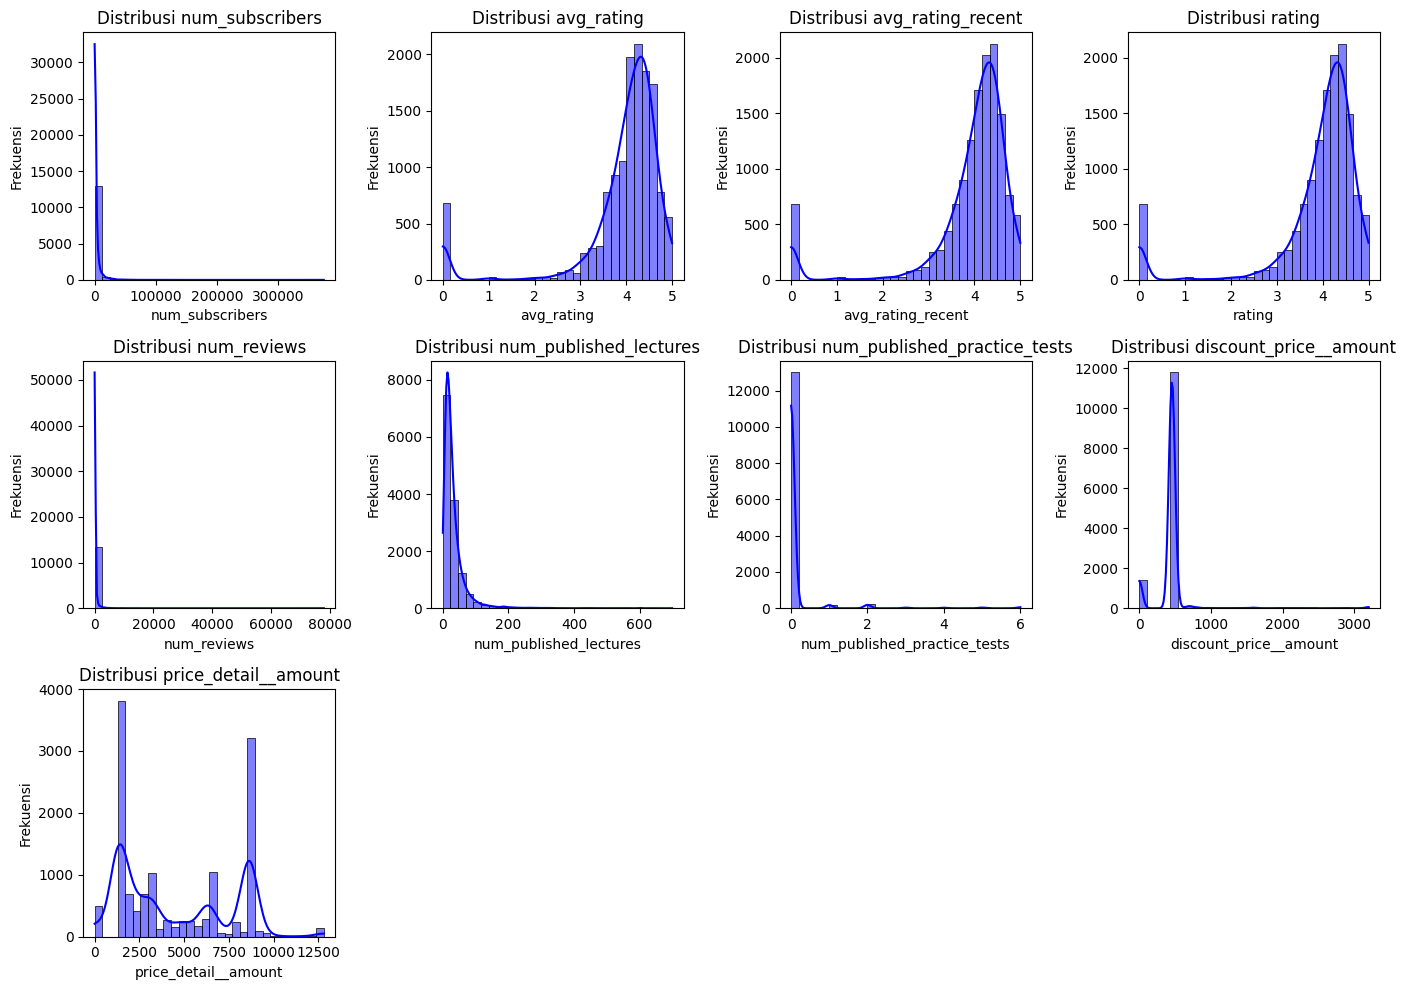

In [10]:
# Pilih hanya fitur numerik
num_features = data_udemy.select_dtypes(include=[np.number])

# Atur ukuran figure
plt.figure(figsize=(14, 10))

# Looping untuk membuat histogram setiap fitur numerik
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)  # Buat grid 3x4 (sesuaikan jika fitur numerik lebih banyak)
    sns.histplot(data_udemy[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

# Atur tata letak supaya rapi
plt.tight_layout()
plt.show()


C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_2568\3508034546.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_udemy[column], palette='viridis')
C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_2568\3508034546.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data_udemy[column], palette='viridis')


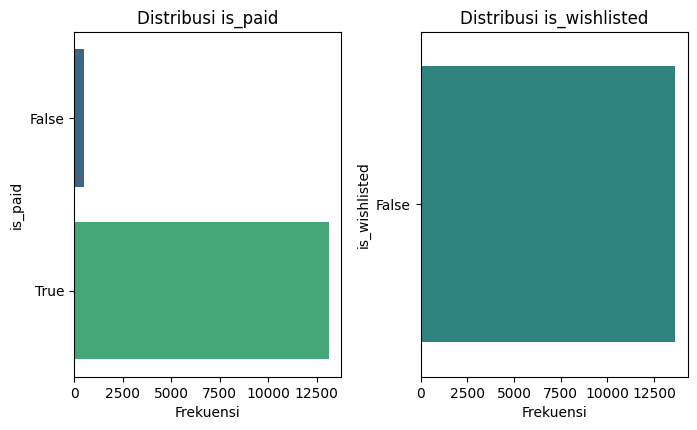

In [11]:
# Pilih hanya fitur kategorikal (tipe object dan boolean)
cat_features = data_udemy.select_dtypes(include=['object', 'bool'])

# Atur ukuran figure
plt.figure(figsize=(14, 8))

# Looping untuk membuat countplot setiap fitur kategorikal
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)  # Buat grid 2x4 (sesuaikan jika fitur kategorikal lebih banyak)
    sns.countplot(y=data_udemy[column], palette='viridis')
    plt.title(f'Distribusi {column}')
    plt.xlabel('Frekuensi')
    plt.ylabel(column)

# Atur tata letak supaya rapi
plt.tight_layout()
plt.show()


dari visualisasi distribusi kategorikal diatas kita ketahui bahwa kolom is_wishlisted hanya memiliki distribusi False maka model tidak bisa menggunakan kolom ini untuk membedakan antara satu data dengan yang lain karena tidak ada variansi nilai yang konstan tidak berkontribusi pada perhitungan jarak (karena variance = 0). Oleh karena itu saya memutuskan untuk menghapus kolom ini.

In [12]:
data_udemy.drop('is_wishlisted', axis=1, inplace=True)

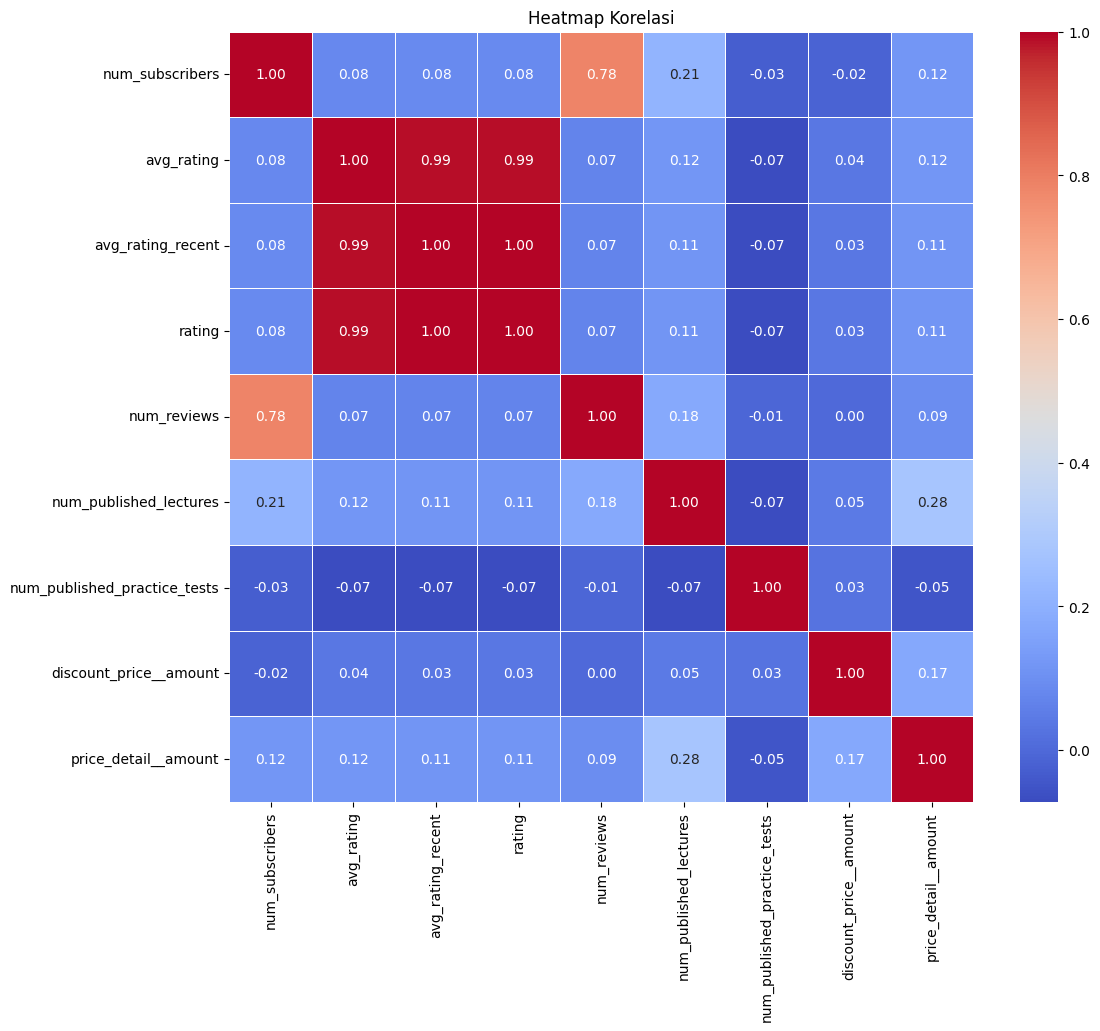

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih hanya fitur numerik
num_features = data_udemy.select_dtypes(include=['float64', 'int64'])

# Buat heatmap korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()


dari visualisasi heatmap korelasi diatas kita bisa ketahui fitur/kolom **avg_rating, avg_rating_recent, dan rating** memiliki korelasi sangat tinggi (mendekati +1), ini menunjukan datanya hampir identik kemungkinan besar karena fitur-fitur ini merepresentasikan konsep yang sama sehingga saya akan menghapus fitur yang redundant seperti **avg_rating_recent** dan **rating** karena korelasinya terlalu tinggi.

In [14]:
data_udemy.drop('avg_rating_recent', axis=1, inplace=True)
data_udemy.drop('rating', axis=1, inplace=True)

In [15]:
data_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   is_paid                       13608 non-null  bool   
 1   num_subscribers               13608 non-null  int64  
 2   avg_rating                    13608 non-null  float64
 3   num_reviews                   13608 non-null  int64  
 4   num_published_lectures        13608 non-null  int64  
 5   num_published_practice_tests  13608 non-null  int64  
 6   discount_price__amount        13608 non-null  float64
 7   price_detail__amount          13608 non-null  float64
dtypes: bool(1), float64(3), int64(4)
memory usage: 757.6 KB


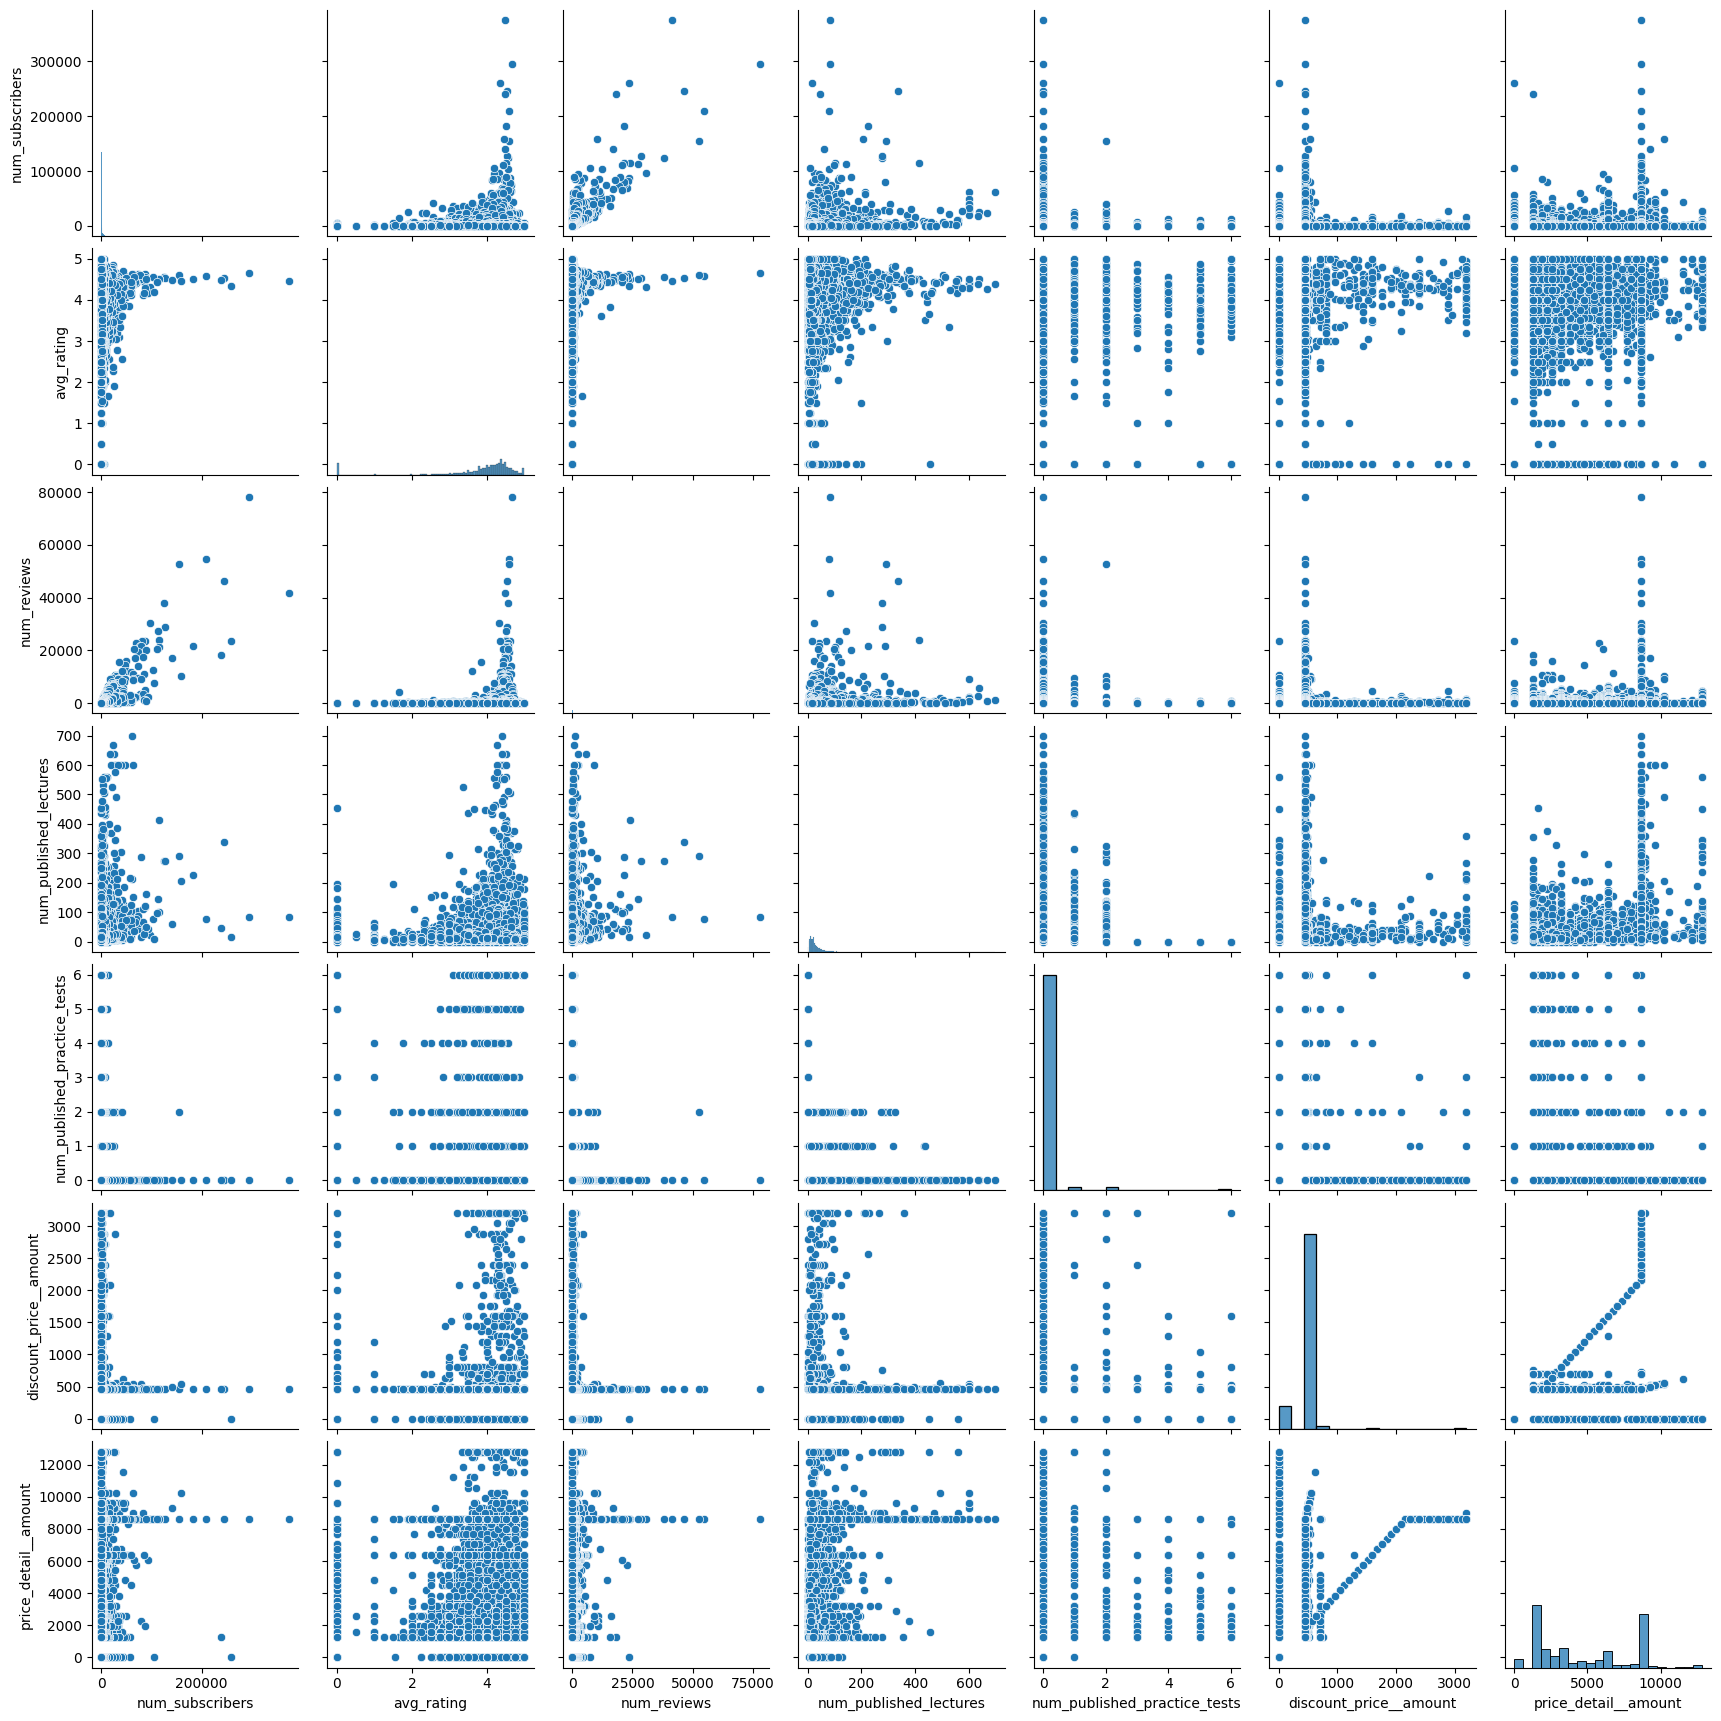

In [16]:
# Pilih hanya fitur numerik
num_features = data_udemy.select_dtypes(include=['float64', 'int64'])

# Buat pairplot
sns.pairplot(num_features)
plt.show()


- Terdapat indikasi outlier pada beberapa fitur numerik utama seperti **num_subscribers**, **num_reviews**, dan **price_detail_amount**.
- Hubungan antar fitur menunjukkan kemungkinan non-linear pada **avg_rating** dan **num_subscribers** sehingga kita perlu model yang mampu menangkap pola non-linear.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [17]:
#Type your code here
# Cek jumlah data yang hilang di setiap kolom
missing_values = data_udemy.isnull().sum()
print(missing_values)

is_paid                         0
num_subscribers                 0
avg_rating                      0
num_reviews                     0
num_published_lectures          0
num_published_practice_tests    0
discount_price__amount          0
price_detail__amount            0
dtype: int64


In [18]:
# Jumlah duplikat di setiap kolom
duplicate_counts = data_udemy.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)

is_paid                         13606
num_subscribers                  8733
avg_rating                      11643
num_reviews                     12323
num_published_lectures          13307
num_published_practice_tests    13601
discount_price__amount          13554
price_detail__amount            13570
dtype: int64


- Kolom is_paid tidak masalah jika terjadi banyak duplikat karena hanya bernilai biner.
- Duplikat pada rating, jumlah review, dan jumlah subscriber kemungkinan karena pola umum jadi dipertahankan.

In [19]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = data_udemy.select_dtypes(include=['int64', 'float64']).columns
data_udemy[numeric_columns] = scaler.fit_transform(data_udemy[numeric_columns])

# Tampilkan hasil normalisasi
data_udemy.head()

,is_paid,num_subscribers,avg_rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
0,True,0.788369,0.932038,1.000000,0.120172,0.000000,0.142187,0.675
1,True,0.557764,0.917912,0.699703,0.111588,0.000000,0.142187,0.675
2,True,0.414267,0.918982,0.674987,0.417740,0.333333,0.142187,0.675
3,True,0.655914,0.908814,0.595429,0.483548,0.000000,0.142187,0.675
4,True,1.000000,0.894160,0.533677,0.118741,0.000000,0.142187,0.675


In [20]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['is_paid']

# Encode kolom kategorikal
for column in categorical_columns:
    data_udemy[column] = label_encoder.fit_transform(data_udemy[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
data_udemy.head()

,is_paid,num_subscribers,avg_rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
0,1,0.788369,0.932038,1.000000,0.120172,0.000000,0.142187,0.675
1,1,0.557764,0.917912,0.699703,0.111588,0.000000,0.142187,0.675
2,1,0.414267,0.918982,0.674987,0.417740,0.333333,0.142187,0.675
3,1,0.655914,0.908814,0.595429,0.483548,0.000000,0.142187,0.675
4,1,1.000000,0.894160,0.533677,0.118741,0.000000,0.142187,0.675


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [21]:
data_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   is_paid                       13608 non-null  int64  
 1   num_subscribers               13608 non-null  float64
 2   avg_rating                    13608 non-null  float64
 3   num_reviews                   13608 non-null  float64
 4   num_published_lectures        13608 non-null  float64
 5   num_published_practice_tests  13608 non-null  float64
 6   discount_price__amount        13608 non-null  float64
 7   price_detail__amount          13608 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 850.6 KB


In [22]:
# Mengambil semua kolom numerik untuk clustering
X = data_udemy[['is_paid','num_subscribers', 'avg_rating', 'num_reviews', 'num_published_lectures', 
                'num_published_practice_tests', 'discount_price__amount', 
                'price_detail__amount']]


# Menampilkan data dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X))


       is_paid  num_subscribers  avg_rating  num_reviews  \
0            1         0.788369    0.932038     1.000000   
1            1         0.557764    0.917912     0.699703   
2            1         0.414267    0.918982     0.674987   
3            1         0.655914    0.908814     0.595429   
4            1         1.000000    0.894160     0.533677   
...        ...              ...         ...          ...   
13603        0         0.000125    0.000000     0.000000   
13604        0         0.000051    0.000000     0.000000   
13605        0         0.000125    0.000000     0.000000   
13606        0         0.000128    0.000000     0.000000   
13607        1         0.000000    0.000000     0.000000   

       num_published_lectures  num_published_practice_tests  \
0                    0.120172                      0.000000   
1                    0.111588                      0.000000   
2                    0.417740                      0.333333   
3                    0.4835

In [23]:
# Buat model KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
data_udemy['cluster'] = kmeans.fit_predict(X)

# Lihat hasil jumlah data di tiap cluster
cluster_counts = data_udemy['cluster'].value_counts().sort_index()
print(f'Jumlah data di tiap cluster:\n{cluster_counts}')

# Lihat centroids dari tiap cluster
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X.columns)
print('\nCentroids tiap cluster:')
print(centroids_df)


Jumlah data di tiap cluster:
cluster
0    13112
1      496
Name: count, dtype: int64

Centroids tiap cluster:
        is_paid  num_subscribers  avg_rating  num_reviews  \
0  1.000000e+00         0.007291    0.784380     0.003085   
1 -8.215650e-15         0.015637    0.792025     0.003965   

   num_published_lectures  num_published_practice_tests  \
0                0.046940                      0.019105   
1                0.023934                      0.000336   

   discount_price__amount  price_detail__amount  
0            1.436800e-01          3.630186e-01  
1            4.440892e-16          9.436896e-16  


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [24]:
from sklearn.metrics import silhouette_score

# Hitung silhouette score
silhouette_avg = silhouette_score(X, data_udemy['cluster'])

print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.6435


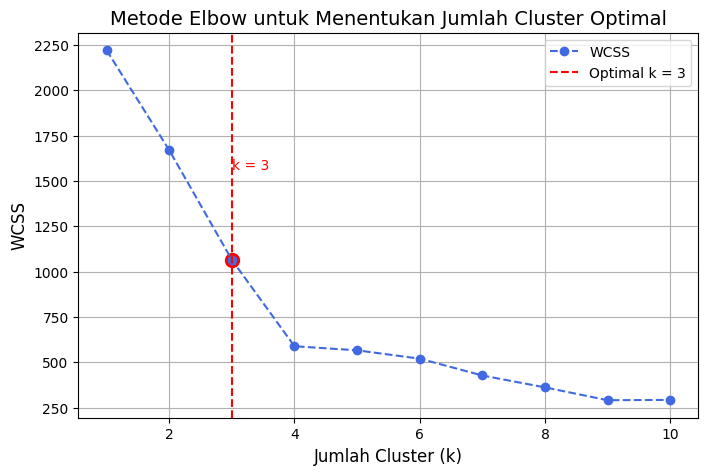

In [25]:
# Tentukan rentang jumlah cluster yang akan diuji
wcss = []  # Within-Cluster Sum of Squares (WCSS)
K = range(1, 11) # Rentang jumlah cluster

# Hitung WCSS untuk setiap nilai k
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Buat plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--', color='royalblue', label='WCSS')

# Menandai titik elbow pada k=3
optimal_k = 3
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', s=100)  # Sorot titik optimal

# Tambahkan teks untuk memperjelas
plt.text(optimal_k, wcss[optimal_k - 1] + 500, f'k = {optimal_k}', color='red', fontsize=10)

# Judul dan label
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal', fontsize=14)
plt.xlabel('Jumlah Cluster (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [26]:
# Mengambil semua kolom numerik untuk clustering
X = data_udemy[['is_paid','num_subscribers', 'avg_rating', 'num_reviews', 'num_published_lectures', 
                'num_published_practice_tests', 'discount_price__amount']]

# Buat model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data_udemy['cluster'] = kmeans.fit_predict(X)

# Lihat hasil jumlah data di tiap cluster
cluster_counts = data_udemy['cluster'].value_counts().sort_index()
print(f'Jumlah data di tiap cluster:\n{cluster_counts}')

# Lihat centroids dari tiap cluster
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X.columns)
print('\nCentroids tiap cluster:')
print(centroids_df)

# Hitung silhouette score
silhouette_avg = silhouette_score(X, data_udemy['cluster'])

print(f'Silhouette Score: {silhouette_avg:.4f}')

Jumlah data di tiap cluster:
cluster
0    12367
1      496
2      745
Name: count, dtype: int64

Centroids tiap cluster:
        is_paid  num_subscribers  avg_rating  num_reviews  \
0  1.000000e+00         0.007708    0.829761     0.003266   
1 -8.215650e-15         0.015637    0.792025     0.003965   
2  1.000000e+00         0.000364    0.031058     0.000081   

   num_published_lectures  num_published_practice_tests  \
0                0.048175                      0.017628   
1                0.023934                      0.000336   
2                0.026442                      0.043624   

   discount_price__amount  
0            1.444500e-01  
1            4.440892e-16  
2            1.308977e-01  
Silhouette Score: 0.7824


Dapat dilihat peningkatan Silhouette Score dengan menerapkan k yang optimal dan feature selection, maka model ini yang akan kita pakai.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

e:\FUN PROJECT\Course Segmentation Based on Popularity and Course Category Prediction\course-segmentation\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


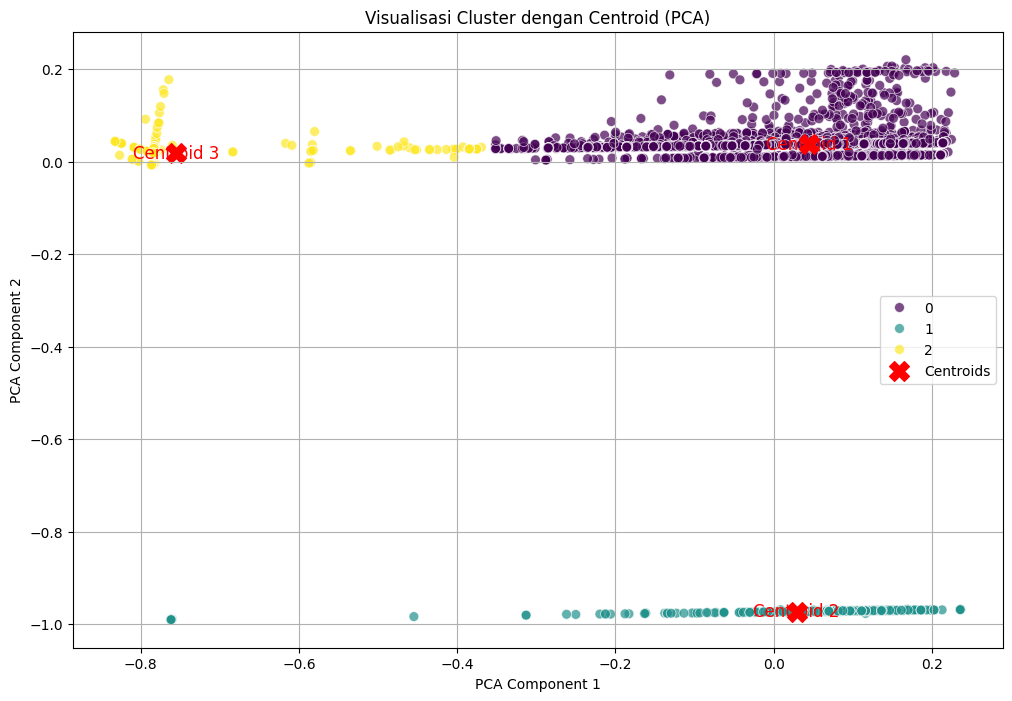


Nilai Centroids:
Centroid 1: [1.         0.00770847 0.82976082 0.00326625 0.04817461 0.01762756
 0.14445005]
Centroid 2: [-8.21565038e-15  1.56369353e-02  7.92025089e-01  3.96487801e-03
  2.39339610e-02  3.36021505e-04  4.44089210e-16]
Centroid 3: [1.00000000e+00 3.63738493e-04 3.10578497e-02 8.07716219e-05
 2.64423769e-02 4.36241611e-02 1.30897651e-01]


In [27]:
# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Menentukan posisi centroid di ruang PCA
centroids = pca.transform(kmeans.cluster_centers_)

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot hasil clustering
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=data_udemy['cluster'], 
    palette='viridis', 
    s=50, 
    alpha=0.7, 
    edgecolors='w'
)

# Plot centroid
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='red', 
    s=200, 
    marker='X', 
    label='Centroids'
)

# Menambahkan label pada centroid
for i, centroid in enumerate(centroids):
    plt.text(
        centroid[0], 
        centroid[1], 
        f'Centroid {i+1}', 
        color='red', 
        fontsize=12, 
        ha='center', 
        va='center'
    )

# Menambahkan elemen visual
plt.title('Visualisasi Cluster dengan Centroid (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

# Menampilkan nilai centroid
print("\nNilai Centroids:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Centroid {i+1}: {centroid}")


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [28]:
# 1. Tambahkan Hasil Label Cluster ke DataFrame
data_udemy['cluster'] = kmeans.labels_
# 2. Lakukan Inverse Transform pada Data Kategorikal
data_udemy['is_paid'] = label_encoder.inverse_transform(data_udemy['is_paid'])


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [29]:
# 3. Lakukan Inverse Transform pada Data Numerik
data_udemy[numeric_columns] = scaler.inverse_transform(data_udemy[numeric_columns])

# 4. Cek Hasil Akhir
print(data_udemy.head())

   is_paid  num_subscribers  avg_rating  num_reviews  num_published_lectures  \
0     True         295509.0     4.66019      78006.0                    84.0   
1     True         209070.0     4.58956      54581.0                    78.0   
2     True         155282.0     4.59491      52653.0                   292.0   
3     True         245860.0     4.54407      46447.0                   338.0   
4     True         374836.0     4.47080      41630.0                    83.0   

   num_published_practice_tests  discount_price__amount  price_detail__amount  \
0                           0.0                   455.0                8640.0   
1                           0.0                   455.0                8640.0   
2                           2.0                   455.0                8640.0   
3                           0.0                   455.0                8640.0   
4                           0.0                   455.0                8640.0   

   cluster  
0        0  
1     

In [30]:
# Geser label cluster dari 0-based ke 1-based
data_udemy['cluster'] = data_udemy['cluster'] + 1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

         is_paid  num_subscribers  avg_rating  num_reviews  \
cluster                                                      
1            1.0      2889.410932    4.148804   254.787418   
2            0.0      5861.286290    3.960125   309.284274   
3            1.0       136.342282    0.155289     6.300671   

         num_published_lectures  num_published_practice_tests  \
cluster                                                         
1                     33.674052                      0.105765   
2                     16.729839                      0.002016   
3                     18.483221                      0.261745   

         discount_price__amount  price_detail__amount  
cluster                                                
1                    462.240155           4717.431875  
2                      0.000000              0.000000  
3                    418.872483           3471.463087  


C:\Users\Rizqi Maulidi\AppData\Local\Temp\ipykernel_2568\3195139107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='avg_rating', data=data_udemy, palette='viridis')


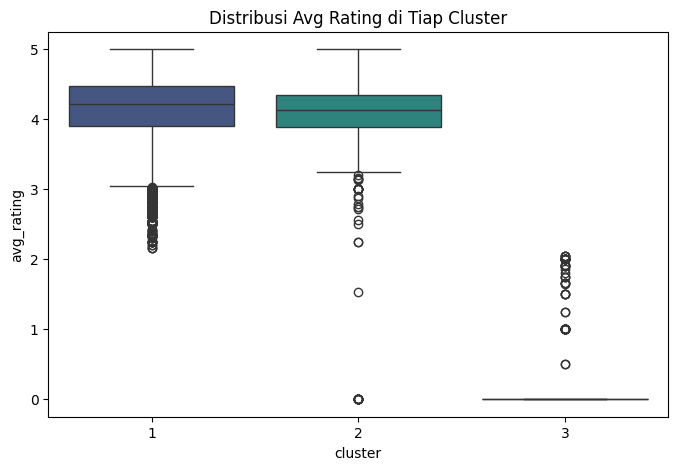

In [31]:
# Melihat rata-rata tiap fitur di setiap cluster
cluster_summary = data_udemy.groupby('cluster').mean()
print(cluster_summary)

plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='avg_rating', data=data_udemy, palette='viridis')
plt.title('Distribusi Avg Rating di Tiap Cluster')
plt.show()


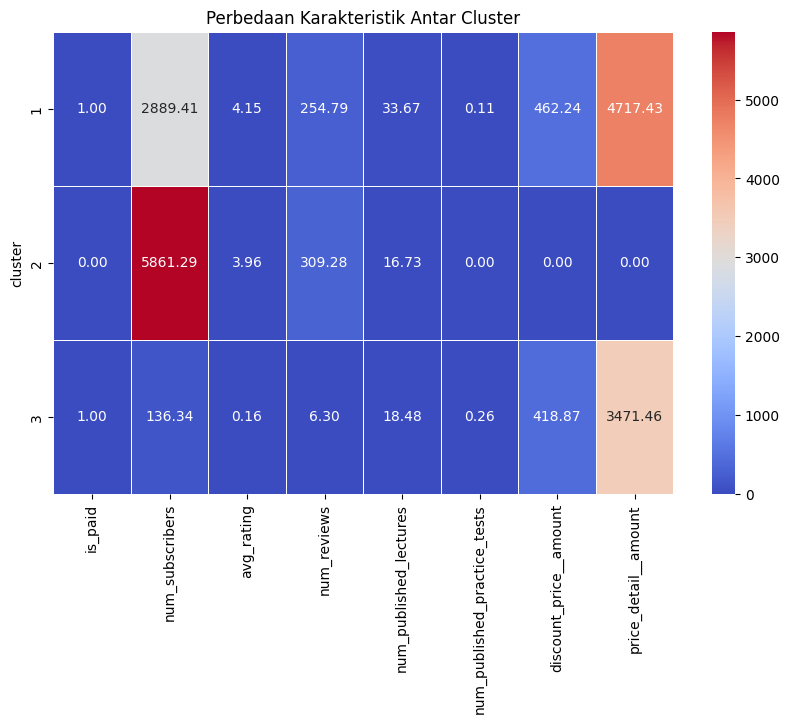

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Perbedaan Karakteristik Antar Cluster')
plt.show()


Tulis hasil interpretasinya di sini.
Berdasarkan hasil clustering dan heatmap, kita dapat mengidentifikasi karakteristik utama dari masing-masing cluster sebagai berikut:
1. Cluster 1: Kursus Populer Berbayar dengan Rating Tinggi
2. Cluster 2: Kursus Gratis dengan Jumlah Subscribers Tinggi
3. Cluster 3: Kursus Berbayar dengan Popularitas dan Rating Rendah

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- is_paid: 1.0 → Kursus berbayar.

- num_subscribers: 2889.41 → Jumlah subscribers yang cukup tinggi.

- avg_rating: 4.15 → Rata-rata rating cukup tinggi.

- num_reviews: 254.79 → Jumlah ulasan cukup banyak.

- num_published_lectures: 33.67 → Jumlah video yang dipublikasikan cukup banyak.

- num_published_practice_tests: 0.11 → Hampir tidak ada tes latihan yang dipublikasikan.

- discount_price__amount: 462.24 → Ada diskon pada harga kursus.

- price_detail__amount: 4717.43 → Harga kursus cenderung tinggi.
- **Analisis:** Cluster 1 mencerminkan kursus premium yang memiliki basis pengguna yang solid. Kursus di Cluster 1 bisa dipertahankan atau ditingkatkan dengan memberikan lebih banyak tes latihan untuk meningkatkan engagement.

## Cluster 2:
- is_paid: 0.0 → Kursus gratis.

- num_subscribers: 5861.29 → Jumlah subscribers tertinggi di antara cluster lainnya.

- avg_rating: 3.96 → Rata-rata rating cukup baik.

- num_reviews: 309.28 → Jumlah ulasan cukup tinggi.

- num_published_lectures: 16.73 → Jumlah materi yang dipublikasikan cukup rendah.

- num_published_practice_tests: 0.00 → Tidak ada tes latihan.

- discount_price__amount: 0.00 → Tidak ada harga diskon karena gratis.

- price_detail__amount: 0.00 → Gratis.
- **Analisis:** Cluster 2 mencerminkan kursus gratis yang populer dan cukup disukai. Kursus di Cluster 2 bisa dimonetisasi dengan menawarkan fitur premium tambahan karena sudah memiliki basis pengguna yang besar.

## Cluster 3:
- is_paid: 1.0 → Kursus berbayar.

- num_subscribers: 136.34 → Jumlah subscribers sangat rendah.

- avg_rating: 0.16 → Rating sangat rendah.

- num_reviews: 6.30 → Jumlah ulasan sangat rendah.

- num_published_lectures: 18.48 → Jumlah materi yang dipublikasikan cukup rendah.

- num_published_practice_tests: 0.26 → Sedikit tes latihan yang dipublikasikan.

- discount_price__amount: 418.87 → Ada diskon pada harga kursus.

- price_detail__amount: 3471.46 → Harga kursus cukup tinggi.
- **Analisis:** Cluster 3 menunjukkan kursus dengan kualitas rendah yang mungkin perlu diperbaiki atau ditawarkan dengan harga lebih kompetitif. Kursus di Cluster 3 bisa diperbaiki dengan meningkatkan kualitas materi atau menurunkan harga untuk menarik lebih banyak pengguna.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan hasil clustering ke dalam file CSV
data_udemy.to_csv('Dataset_clustering.csv', index=False)

print("File Dataset_clustering.csv berhasil disimpan!")

File Dataset_clustering.csv berhasil disimpan!
